In [ ]:
 import numpy as np
import pandas as pd
import networkx as nx
import csv
import math
import matplotlib.pyplot as plt

In [ ]:
!pip install python-louvain
import community.community_louvain as cl

In [ ]:
import community
import matplotlib.cm as cm

## Расчёт уровня инфраструктурной обеспеченности (F). Список критериев:
1. Обеспеченность местами в школах
2. Обеспеченность местами в дс
3. Наличие ФАП
4. Наличие банкомата
5. ...

F = a*x1 + b*x2 + c*x3...
где a, b, c... - коэффициент влияния направления (задаётся по желанию, в данном случае равны 1)
x - показатель

In [ ]:
# Чтение данных из файла или создание данных
data = pd.read_csv('infrastructure_nao.csv', skiprows=[0], delimiter=';', names=['name','school','kindergarden','post','library','culture','atm','health','port','airport','pristan','shop', 'pvz', 'gas', 'mfc'])

df_inf = pd.DataFrame(data)

# Нормализация данных

def normalize_columns(df_inf, columns=None):
    if not columns:
        columns = df_inf.columns[1:] # все колонки кроме первой

    for col in columns:
        max_value = float(df_inf[col].max())
        min_value = float(df_inf[col].min())

        df_inf[col] = (df_inf[col].astype('float') - min_value) / (max_value - min_value)
    return df_inf


# Нормализуем данные
normalized_df_inf = normalize_columns(df_inf)

# Суммируем нормализованные значения
summed_values = normalized_df_inf.iloc[:, 1:].sum(axis=1) #Все строки и колонки кроме первых

# Добавляем итоговую сумму к исходному DataFrame
result_df_inf = df_inf.copy()
result_df_inf['ind'] = summed_values

result_df_inf = result_df_inf[[result_df_inf.columns[0], result_df_inf.columns[-1]]] #Выбираем только столбцы с названием и итоговой оценкой

df_towns = pd.read_csv('main_towns.csv', delimiter = ';') #Читаем файл с опорными городами
combined_df = pd.concat([result_df_inf, df_towns])

# Запись результата в файл
#combined_df.to_csv("result_inf_1.csv", sep=';', index=False)

#print(combined_df)
combined_df.sort_values(by='ind', ascending=False)

,name,ind
9,Красноярск,15.000000
7,Норильск,15.000000
6,Новый Уренгой,15.000000
4,Магадан,15.000000
3,Якутск,15.000000
1,Архангельск,15.000000
10,Усинск,14.000000
2,Воркута,14.000000
0,Нарьян-Мар,14.000000
5,Тарко-Сале,13.000000


Расчёт функции времени (T). Виды транспорта:
1. Автомобильный (car)
2. Авиационный (plane)
3. Водный_теплоход (water_ship)
4. Водный_личный (water_boat)
5. Зимний (winter)

2 времени года лето (warm), зима (cold). Для каждого отдельный расчёт. Коэффициенты риска меняются (задаются самостоятельно, отдельно для каждого эксперимента)

T = t * an
an - коэффициент риска транспорта (ratio)


## **Расчёт холодного времени года**

In [ ]:
#Данные на всякий случай сохранить в кодировке utf-8 (через блокнот)
car_ratio=1.3
plane_ratio=1.5
winter_ratio=1.5


# Чтение данных из CSV-файлаw
df = pd.read_csv("cold_time_nao.csv", delimiter=';', names=['depart','arrival','car','plane','winter']) #Перед этим в экселе установить числовой формат и убрвть первую строку с названиями столбцов

#Замена , на .
df['car'] = df['car'].apply(lambda x: x.replace(',', '.')).astype('float')
df['plane'] = df['plane'].apply(lambda x: x.replace(',', '.')).astype('float')
df['winter'] = df['winter'].apply(lambda x: x.replace(',', '.')).astype('float')

print(df)

#Умножение по столбцам на коэффициенты риска
df['car'] = df['car'].apply(lambda x: car_ratio*x)
df['plane'] = df['plane'].apply(lambda x: plane_ratio*x)
df['winter'] = df['winter'].apply(lambda x: winter_ratio*x)

# Запись результата в файл
#df.to_csv("result_time.csv", sep=';', index=False)

         depart      arrival   car  plane  winter
0         Андег  Нельмин-Нос   0.0   0.98     0.0
1   Архангельск   Нарьян-Мар  46.0   1.25     0.0
2   Архангельск         Несь   0.0   2.00     0.0
3   Архангельск         Чижа   0.0   2.33     0.0
4   Архангельск          Ома   0.0   2.17     0.0
..          ...          ...   ...    ...     ...
89    Усть-Кара    Каратайка   0.0   1.01     0.0
90       Харута    Хорей-Вер   0.0   0.63     0.0
91     Хонгурей      Каменка   0.0   0.00     1.0
92         Чижа       Индига   0.0   1.29     0.0
93        Шойна         Чижа   0.0   0.44     0.0

[94 rows x 5 columns]


In [ ]:
# Чтение данных из файла
df_time = df

# Получение минимальных значений, игнорируя 0 и первые два столбца
results = df.iloc[:, 2:].replace(0, np.nan).apply(lambda x: x.min(), axis=1)

#Сохранение результатов в таблицу
new_df = df_time.copy()
new_df['min'] = results

#Выбор столбцов с названием н.п. и минимальным временем
min_time_cold = new_df[['depart', 'arrival','min']]

#Заполнение пустых строк нулями
min_time_cold['min'] = min_time_cold['min'].fillna(0)

# Печать результатов и их сохранение в файл
print(min_time_cold)
#min_time_warm.to_csv("min_time_warm_3.csv", sep=';', index=False)

         depart      arrival    min
0         Андег  Нельмин-Нос  1.470
1   Архангельск   Нарьян-Мар  1.875
2   Архангельск         Несь  3.000
3   Архангельск         Чижа  3.495
4   Архангельск          Ома  3.255
..          ...          ...    ...
89    Усть-Кара    Каратайка  1.515
90       Харута    Хорей-Вер  0.945
91     Хонгурей      Каменка  1.500
92         Чижа       Индига  1.935
93        Шойна         Чижа  0.660

[94 rows x 3 columns]


<ipython-input-47-a3b3af83ea1c>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  min_time_cold['min'] = min_time_cold['min'].fillna(0)


## Расчёт гравитационной силы (G)

In [ ]:
#Чтение файлов с уровнем инфраструктурной обеспеченности и данными по времени
settl = dict(zip(combined_df['name'], combined_df['ind'])) #Не забыть менять названия файлов, удалить строку в блокноте
connect = min_time_cold.values.tolist()

# Преобразование данных и вычисление
Gravity = []
for row in connect:
    try:
        F1 = float(settl[row[0]])
        F2 = float(settl[row[1]])
        r = float(row[2])
        if r == 0:
            LocalGravity = 0
        else:
            LocalGravity = (F1 - F2) / (r ** 2)  # Убрать модуль, чтобы граф стал направленным, тогда можно анализировать что к чему притягивается
        Gravity.append([row[0], row[1], LocalGravity])
    except KeyError:
        continue  # Пропускаем строки, если ключ не найден
#Сохранение данных в файл csv
local_gravity = pd.DataFrame(Gravity, columns=['settl1', 'settl2','LocalGravity'])
#local_gravity.to_csv('Local_gravity_warm_3.csv', sep=';', index=False)

print(local_gravity)

         settl1       settl2  LocalGravity
0         Андег  Нельмин-Нос     -0.874121
1   Архангельск   Нарьян-Мар      0.284444
2   Архангельск         Несь      0.753086
3   Архангельск         Чижа      0.868693
4   Архангельск          Ома      0.744584
..          ...          ...           ...
89    Усть-Кара    Каратайка      0.193639
90       Харута    Хорей-Вер      1.493053
91     Хонгурей      Каменка      0.493827
92         Чижа       Индига     -0.994124
93        Шойна         Чижа      7.014590

[94 rows x 3 columns]


## Создание матрицы времени

In [ ]:
import pandas as pd
import numpy as np
import pickle

# Чтение данных из CSV файла с указанием правильного разделителя
df_matrix = min_time_cold
print(df_matrix.columns)

Index(['depart', 'arrival', 'min'], dtype='object')


In [ ]:
import pandas as pd
import numpy as np
import pickle

# Проверка наличия нужных столбцов
if not all(col in df_matrix.columns for col in ['depart', 'arrival', 'min']):
    print("Не все нужные столбцы присутствуют в CSV!")
else:
    # Получаем уникальные названия населённых пунктов
    unique_places = sorted(set(df_matrix['depart'].unique()) | set(df_matrix['arrival'].unique()))

    # Создаём пустую квадратную матрицу размером len(unique_places) x len(unique_places)
    matrix = np.zeros((len(unique_places), len(unique_places)))

    # Заполняем матрицу значениями из DataFrame
    for index, row in df_matrix.iterrows():
        i = unique_places.index(row['depart'])
        j = unique_places.index(row['arrival'])

        # Добавляем значение времени в обе стороны (если нет ограничений на направление)
        matrix[i][j] = row['min']
        matrix[j][i] = row['min']  # Если направления не симметричны, то закомментируйте эту строку

    # Преобразуем матрицу в DataFrame с индексами и заголовками
    result_df = pd.DataFrame(matrix, columns=unique_places, index=unique_places)

    # Сохраняем результат в новый файл в формате Pickle
    with open('result_matrix_3.pkl', 'wb') as file:
        pickle.dump(result_df, file)
result_df

,Алеко-Кюёль,Амбарчик,Андрюшкино,Анюйск,Аргахтах,Берёзовка,Билибино,Две Виски,Ермолово,Илирней,...,Походск,Сватай,Среднеколымск,Сылгы-Ытар,Тимкино,Хатынгнах,Черский,Чукочья,Эбях,Якутск
Алеко-Кюёль,0.000,0.0,0.000,0.0000,0.000,0.000,0.0000,0.0000,0.0000,0.000,...,0.0000,0.00,0.9420,0.0000,0.0,0.0000,2.2980,0.0,0.000,0.0
Амбарчик,0.000,0.0,0.000,0.0000,0.000,0.000,0.0000,0.0000,0.0000,0.000,...,0.0000,0.00,0.0000,0.0000,0.0,0.0000,0.0000,0.0,0.000,0.0
Андрюшкино,0.000,0.0,0.000,0.0000,0.000,0.000,0.0000,0.0000,0.0000,0.000,...,0.0000,0.00,0.0000,0.0000,0.0,0.0000,1.6740,0.0,0.000,0.0
Анюйск,0.000,0.0,0.000,0.0000,0.000,0.000,4.7487,4.6280,4.8100,0.000,...,7.8689,0.00,0.0000,0.0000,0.0,0.0000,1.2650,0.0,0.000,0.0
Аргахтах,0.000,0.0,0.000,0.0000,0.000,0.000,0.0000,0.0000,0.0000,0.000,...,0.0000,0.00,0.6540,0.0000,0.0,0.0000,0.0000,0.0,0.000,0.0
Берёзовка,0.000,0.0,0.000,0.0000,0.000,0.000,0.0000,0.0000,0.0000,0.000,...,0.0000,0.00,0.7740,0.0000,0.0,0.0000,0.0000,0.0,0.000,0.0
Билибино,0.000,0.0,0.000,4.7487,0.000,0.000,0.0000,0.0000,0.0000,0.000,...,0.0000,0.00,0.0000,0.0000,0.0,0.0000,0.0000,0.0,0.000,0.0
Две Виски,0.000,0.0,0.000,4.6280,0.000,0.000,0.0000,0.0000,2.2880,0.000,...,5.0570,0.00,0.0000,0.0000,0.0,0.0000,2.9081,0.0,0.000,0.0
Ермолово,0.000,0.0,0.000,4.8100,0.000,0.000,0.0000,2.2880,0.0000,0.000,...,4.5929,0.00,0.0000,0.0000,0.0,0.0000,2.4440,0.0,0.000,0.0
Илирней,0.000,0.0,0.000,0.0000,0.000,0.000,0.0000,0.0000,0.0000,0.000,...,0.0000,0.00,0.0000,0.0000,0.0,0.0000,0.0000,0.0,0.000,0.0


## Определение локальных опорных пунктов.

## Создание графа и его анализ

### Граф по G

In [ ]:
# Чтение CSV файла
df_row = local_gravity

# Функция для обработки строк
def process_row(row):
    if row['LocalGravity'] < 0:
        # Меняем города местами и делаем значение положительным
        row['settl1'], row['settl2'] = row['settl2'], row['settl1']
        row['LocalGravity'] = abs(row['LocalGravity'])
    return row

# Применяем функцию ко всем строкам
df_row = df_row.apply(process_row, axis=1)
df_row.sort_values(by='LocalGravity', ascending=False)

,settl1,settl2,LocalGravity
41,Нарьян-Мар,Андег,200.160713
24,Шойна,Кия,160.712981
78,Ома,Снопа,85.733882
77,Ома,Вижас,71.590328
15,Белушье,Волонга,46.611237
...,...,...,...
9,Архангельск,Харьягинский,0.006184
30,Архангельск,Красное,0.001613
60,Нарьян-Мар,Мезень,0.000349
16,Воркута,Амдерма,0.000268


In [ ]:
#Нормирование значений
def normalize_column_and_sort_descending(df_norm, column_name):
    # Получаем минимальное и максимальное значения в колонке
    min_value = df_norm[column_name].min()
    max_value = df_norm[column_name].max()

    # Нормализуем значения от 0 до 100
    df_norm[column_name] = ((df_norm[column_name] - min_value) / (max_value - min_value)) * 100

    # Сортируем таблицу по нормализованному столбцу в порядке убывания
    df_norm.sort_values(by=column_name, ascending=False, inplace=True)

    return df_norm

df_norm = df_row
sorted_normalized_df = normalize_column_and_sort_descending(df_norm, 'LocalGravity')
print(sorted_normalized_df)

         settl1        settl2  LocalGravity
41   Нарьян-Мар         Андег    100.000000
24        Шойна           Кия     80.291971
78          Ома         Снопа     42.832522
77          Ома         Вижас     35.766423
15      Белушье       Волонга     23.286906
..          ...           ...           ...
9   Архангельск  Харьягинский      0.003090
30  Архангельск       Красное      0.000806
60   Нарьян-Мар        Мезень      0.000175
16      Воркута       Амдерма      0.000134
12        Вижас          Чижа      0.000000

[94 rows x 3 columns]


In [ ]:
# Чтение данных
data_graph = sorted_normalized_df

# Создание направленного графа
G = nx.DiGraph()
# Проверить имена столбцов
print(data_graph.columns)
G

Index(['settl1', 'settl2', 'LocalGravity'], dtype='object')


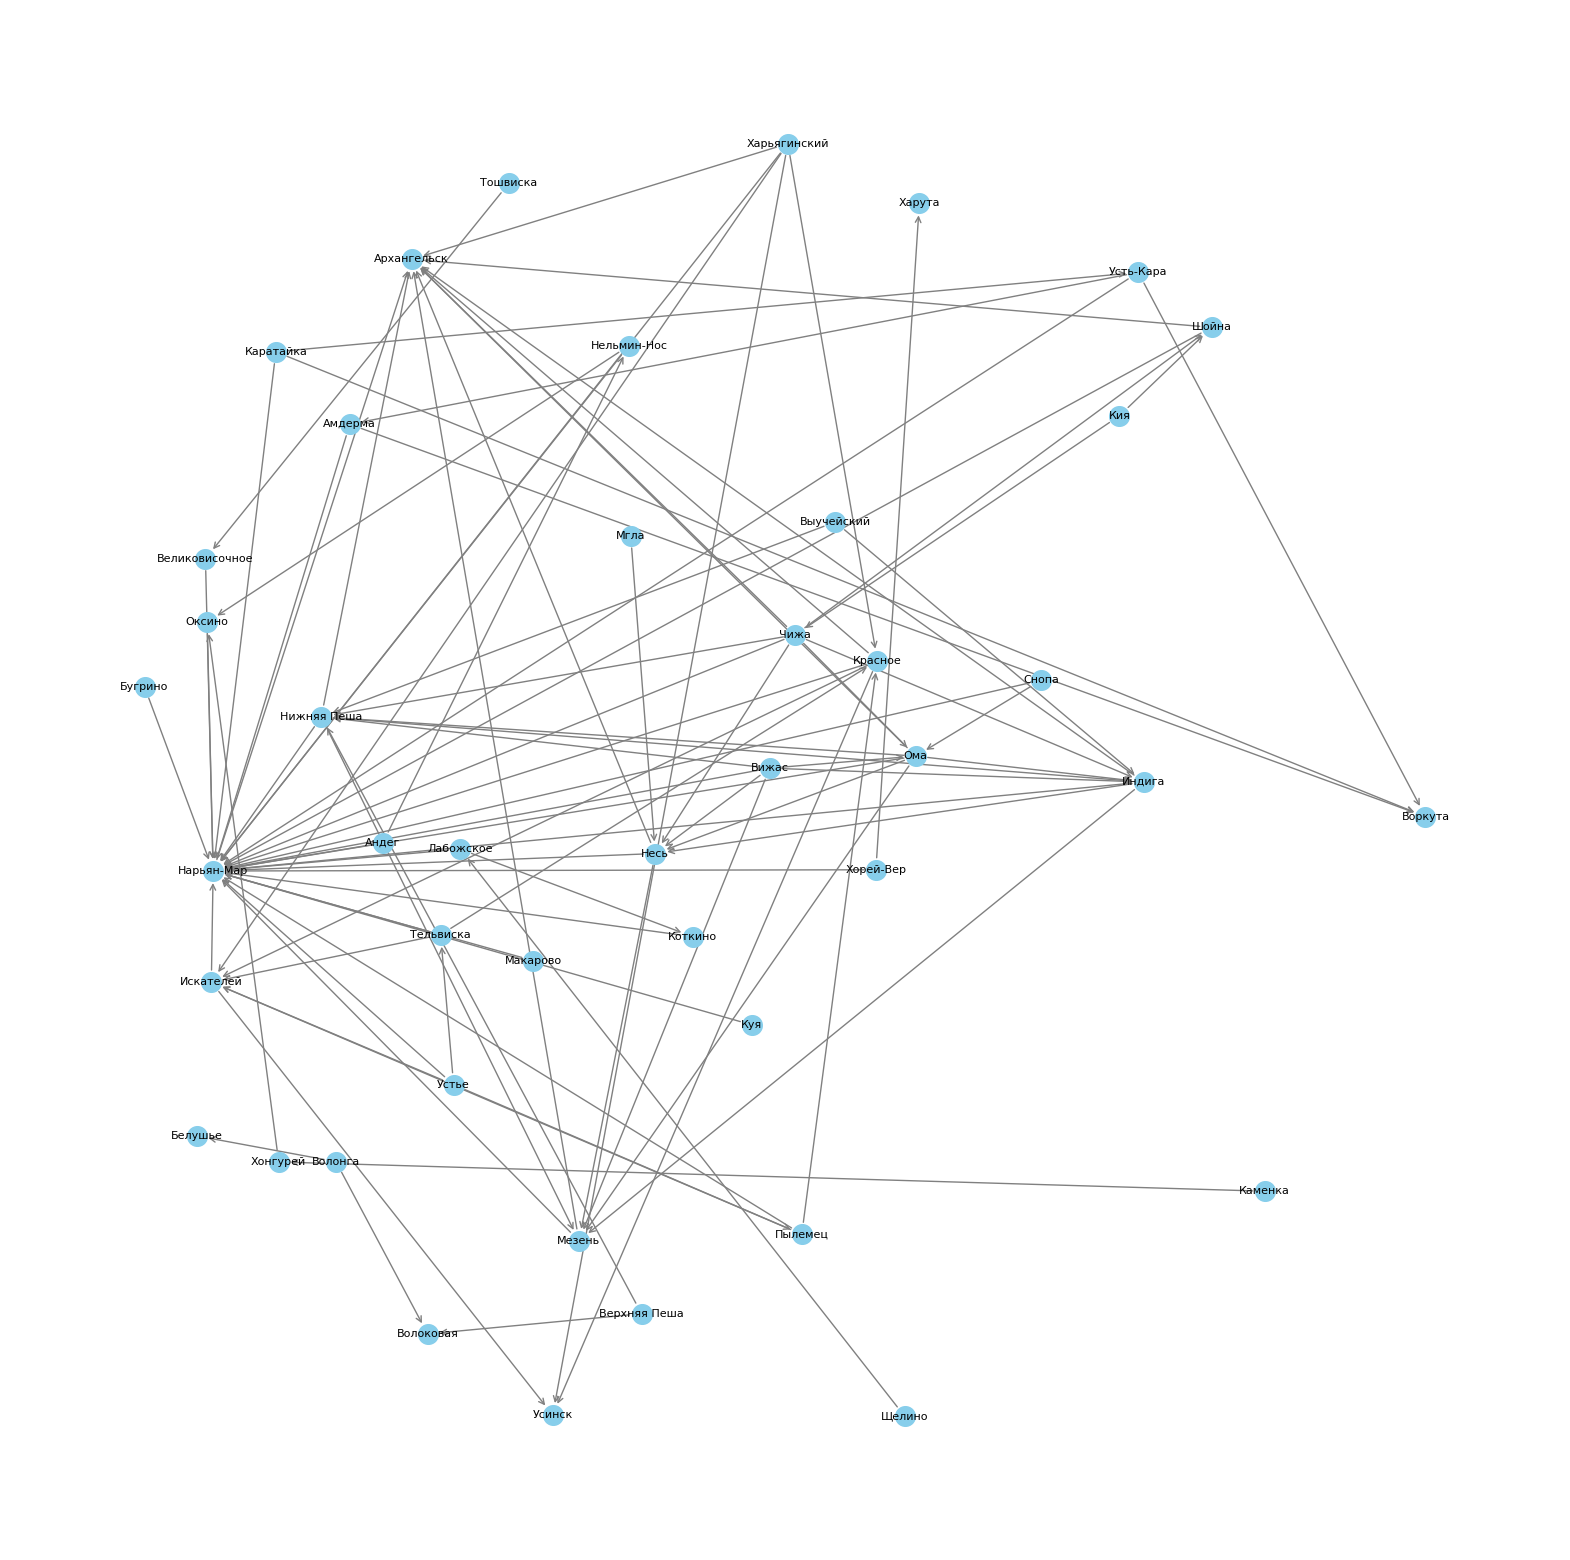

<Figure size 640x480 with 0 Axes>

In [ ]:
for _, row in data_graph.iterrows():
    source = row['settl2']  # Начальная вершина
    target = row['settl1']  # Конечная вершина
    gravity_force = row['LocalGravity']

    # Проверяем, чтобы гравитационная сила была ненулевой
    if gravity_force != 0:
        G.add_edge(source, target, weight=gravity_force)

# Настройка параметров для визуализации
pos = nx.spring_layout(G, k=1, scale=3)  # Расположение узлов
edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}  # Метки для рёбер
plt.figure(figsize=(20,20))  # Размер графика
nx.draw_networkx_nodes(G, pos, node_size=200, node_color='skyblue')  # Узлы
nx.draw_networkx_edges(G, pos, edge_color='gray', arrowstyle='->', arrows=True)  # Рёбра
nx.draw_networkx_labels(G, pos, font_size=8, font_family='sans-serif')  # Метки узлов
#nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)  # Метки рёбер

#Визуализация
plt.axis('off')
plt.show()
plt.savefig("graph_warm_G_3.png", format="png")

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
# Получение списка всех узлов
all_nodes = list(G.nodes())
# Подсчет количества входящих рёбер для каждого узла
incoming_counts = {}
for node in all_nodes:
    incoming_count = len(list(G.predecessors(node)))
    incoming_counts[node] = incoming_count

# Получение топ-10 узлов с наибольшим количеством входящих рёбер
top_10_nodes = Counter(incoming_counts).most_common(10)

# Печать результата
for node, count in top_10_nodes:
    print(f"{node}: {count}")

Нарьян-Мар: 28
Архангельск: 10
Несь: 5
Искателей: 5
Нижняя Пеша: 5
Мезень: 5
Индига: 5
Ома: 3
Красное: 3
Воркута: 3


### Граф по Т

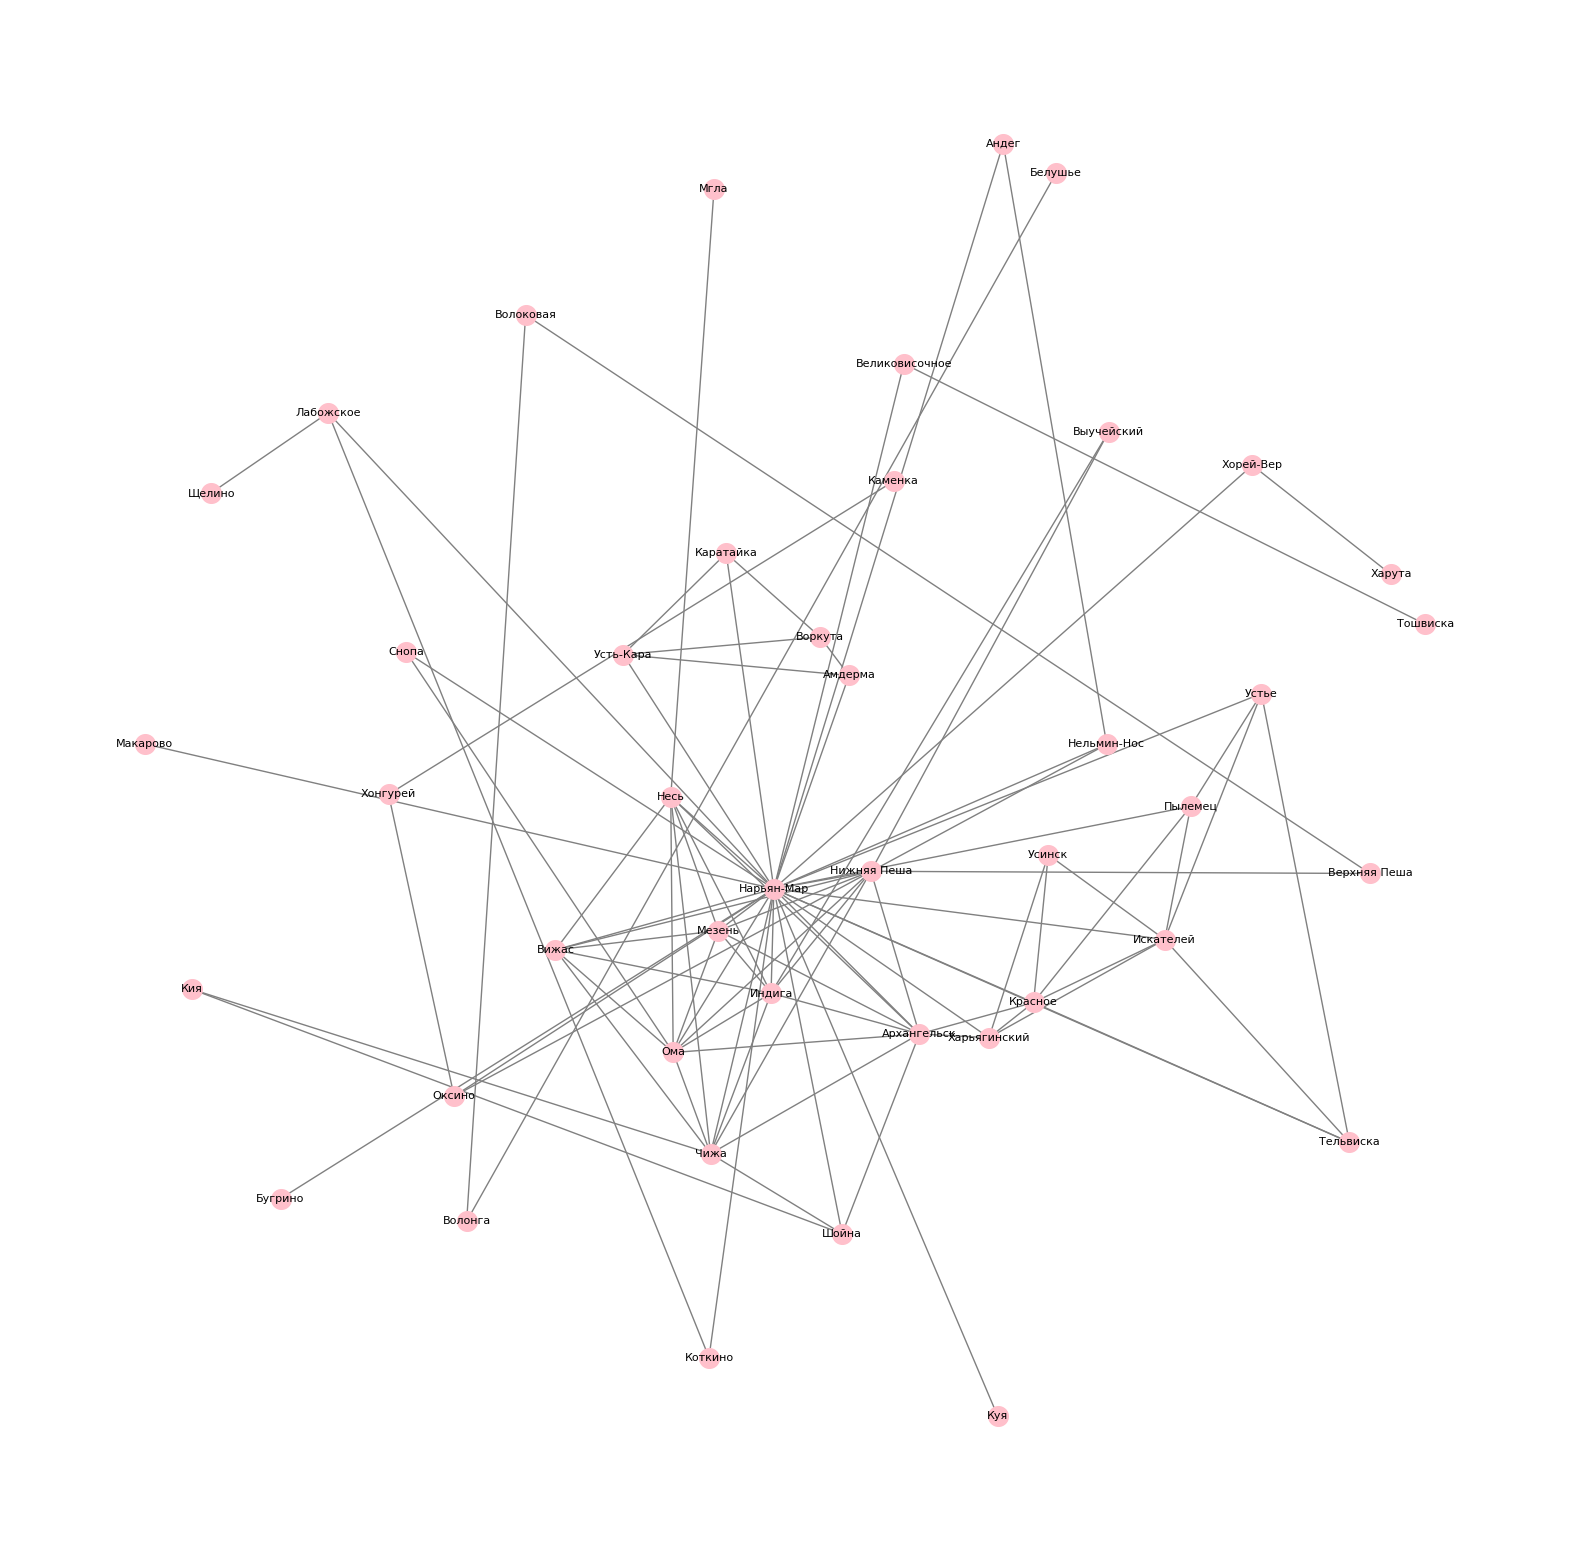

Нарьян-Мар: 29
Архангельск: 10
Чижа: 9
Ома: 9
Нижняя Пеша: 9
Индига: 9
Несь: 8
Мезень: 7
Вижас: 7
Искателей: 7


In [ ]:
# Чтение данных из CSV-файла
data_graph_time = min_time_cold

# Создаем пустой ненаправленный граф
G_time = nx.Graph()
for _, row in data_graph_time.iterrows():
    settl1 = row['depart']
    settl2 = row['arrival']
    time = row['min']

    # Если время между деревнями не равно нулю, добавляем ребро
    if time != 0:
        G_time.add_edge(settl1, settl2, weight=time)

# Настройка параметров для визуализации
pos_time = nx.spring_layout(G_time, k=1, scale=4)  # Расположение узлов
edge_labels_time = {(u, v): d['weight'] for u, v, d in G_time.edges(data=True)}  # Метки для рёбер
G_time
plt.figure(figsize=(20,20))  # Размер графика
nx.draw_networkx_nodes(G_time, pos_time, node_size=200, node_color='pink')  # Узлы
nx.draw_networkx_edges(G_time, pos_time, edge_color='gray')  # Рёбра
nx.draw_networkx_labels(G_time, pos_time, font_size=8, font_family='sans-serif')  # Метки узлов
#nx.draw_networkx_edge_labels(G_time, pos_time, edge_labels=edge_labels, font_size=10)  # Метки рёбер

#Визуализация
plt.axis('off')
plt.show()
# Подсчет количества рёбер для каждого узла
degree_counts = dict(G_time.degree())

# Получение топ-10 узлов с наибольшим количеством рёбер
top_10_nodes = Counter(degree_counts).most_common(10)

# Печать результата
for node, count in top_10_nodes:
    print(f"{node}: {count}")

### Анализ графа

### Анализ кластеров

In [ ]:
data_graph_G = sorted_normalized_df
# Создание ненаправленного графа
G_undirect = nx.Graph()

for _, row in data_graph_G.iterrows():
    vertex1 = row['settl1']  # Первая вершина
    vertex2 = row['settl2']  # Вторая вершина
    gravity_force = row['LocalGravity']

    # Проверяем, чтобы гравитационная сила была ненулевой
    if gravity_force != 0:
        G_undirect.add_edge(vertex1, vertex2, weight=gravity_force)
G_undirect

### Обратный граф

In [ ]:
import pandas as pd
# Функция для обработки значений
def  gravity_reverse(x):
    if x == 0:
        return 0
    else:
        return 1 / x

# Применяем функцию к столбцу 'Цена'
df_reverse = sorted_normalized_df.copy()
df_reverse['reverse_gravity'] = df_reverse['LocalGravity'].apply(gravity_reverse)

columns_to_drop = ['LocalGravity']
df_reverse.drop(columns_to_drop, axis=1, inplace=True)
#df_reverse.sort_values(by='reverse_gravity', ascending=False)

In [ ]:
#Граф с обратным G (то есть 1/G)
data_reverse = df_reverse
# Создание направленного графа
G_reverse = nx.DiGraph()
for _, row in data_reverse.iterrows():
    source = row['settl2']  # Начальная вершина
    target = row['settl1']  # Конечная вершина
    gravity_force = row['reverse_gravity']

    # Проверяем, чтобы гравитационная сила была ненулевой
    if gravity_force != 0:
        G_reverse.add_edge(source, target, weight=gravity_force)

### Кластеризация

In [ ]:
# Выполнение модулярной кластеризации. мера качества разбиения графа на сообщества. Она позволяет находить группы узлов, внутри которых связи сильнее, чем снаружи.
partition = cl.best_partition(G_undirect)
mod = cl.modularity(partition, G_undirect)

print("Модулярность:", mod)

# Распечатка сообществ
communities = {}
for node, com_id in partition.items():
    if com_id not in communities:
        communities[com_id] = []
    communities[com_id].append(node)

for com_id, nodes in communities.items():
    print(f"Сообщество {com_id + 1}: {', '.join(nodes)}")

Модулярность: 0.6424543230802369
Сообщество 1: Нарьян-Мар, Андег, Лабожское, Макарово, Искателей, Тельвиска, Коткино, Устье, Куя, Великовисочное, Бугрино, Хорей-Вер, Пылемец, Красное, Тошвиска, Харута, Каратайка, Усинск, Харьягинский, Щелино
Сообщество 2: Шойна, Кия
Сообщество 3: Ома, Снопа, Вижас, Несь, Чижа, Мгла, Нижняя Пеша, Мезень, Индига, Выучейский, Архангельск
Сообщество 4: Белушье, Волонга, Волоковая, Верхняя Пеша
Сообщество 6: Оксино, Нельмин-Нос, Хонгурей, Каменка
Сообщество 5: Воркута, Усть-Кара, Амдерма


In [ ]:
import networkx as nx
from itertools import combinations

def calculate_centroid_distance(G, community_nodes):
    """
    Функция для расчета среднего расстояния между узлом и всеми остальными узлами в сообществе.

    :param G: Граф NetworkX
    :param community_nodes: Список узлов, принадлежащих одному сообществу
    :return: Словарь, где ключ - узел, значение - среднее расстояние до всех остальных узлов в сообществе
    """
    distances = {}
    for u in community_nodes:
        total_distance = sum(nx.shortest_path_length(G, source=u, target=v) for v in community_nodes if u != v)
        avg_distance = total_distance / (len(community_nodes) - 1)
        distances[u] = avg_distance
    return distances

def find_communities_centroids(G, communities):
    """
    Функция для нахождения центра каждой общины.

    :param G: Граф NetworkX
    :param communities: Словарь, где ключ - ID сообщества, значение - список узлов, принадлежащих этому сообществу
    :return: Словарь, где ключ - ID сообщества, значение - центроид данного сообщества
    """
    centroids = {}
    for com_id, nodes in communities.items():
        distances = calculate_centroid_distance(G, nodes)
        centroid = min(distances, key=lambda x: distances[x])  # Узел с минимальной средней дистанцией
        centroids[com_id] = centroid
    return centroids

# Пример использования функции
centroids = find_communities_centroids(G_undirect, communities)

# Печать результатов
for com_id, centroid in centroids.items():
    print(f"Центроид сообщества {com_id + 1}: {centroid}")

Центроид сообщества 1: Нарьян-Мар
Центроид сообщества 2: Шойна
Центроид сообщества 3: Ома
Центроид сообщества 4: Волонга
Центроид сообщества 6: Оксино
Центроид сообщества 5: Воркута


In [ ]:
from networkx.algorithms.centrality import degree_centrality

communities = partition.values()
community_centers = {}

for comm_id in set(communities):
    nodes_in_comm = [node for node, c in partition.items() if c == comm_id]
    degrees = {node: G_undirect.degree(node) for node in nodes_in_comm}
    center = max(degrees, key=degrees.get)
    community_centers[comm_id] = center
print("Центры сообществ:", community_centers)

Центры сообществ: {0: 'Нарьян-Мар', 1: 'Шойна', 2: 'Архангельск', 3: 'Волонга', 4: 'Усть-Кара', 5: 'Оксино'}


### Выявление частовстречаемых поселений

In [ ]:
# Расчёт степенной центральности
degree = nx.degree_centrality(G)

# Сортируем населённые пункты по уменьшению степенной центральности
sorted_centralities = sorted(degree.items(), key=lambda x: x[1], reverse=True)

important_nodes_sc = [k for k, v in sorted_centralities[:9]]
print(important_nodes_sc)

['Нарьян-Мар', 'Архангельск', 'Ома', 'Нижняя Пеша', 'Индига', 'Чижа', 'Несь', 'Искателей', 'Мезень']


In [ ]:
#Вершины на концах мостов. Критичны для удаления
bridges = list(nx.bridges(G_undirect))
bridge_nodes = set([u for u, _ in bridges] + [v for _, v in bridges])
print(bridge_nodes)

{'Белушье', 'Бугрино', 'Макарово', 'Тошвиска', 'Харута', 'Хонгурей', 'Верхняя Пеша', 'Лабожское', 'Нижняя Пеша', 'Оксино', 'Щелино', 'Нарьян-Мар', 'Великовисочное', 'Волоковая', 'Куя', 'Каменка', 'Волонга', 'Хорей-Вер', 'Несь', 'Мгла'}


In [ ]:
#Только для графа с временем
# Центральность по промежуточности, показывает, насколько часто узел находится на кратчайших путях между другими узлами графа

bc = nx.betweenness_centrality(G_reverse, normalized=False)
sorted_bc = sorted(bc.items(), key=lambda item: item[1], reverse=True)
important_nodes_bc = [k for k, v in sorted_bc[:8]]
print(important_nodes_bc)

['Нарьян-Мар', 'Нижняя Пеша', 'Чижа', 'Ома', 'Индига', 'Оксино', 'Несь', 'Лабожское']


In [ ]:
#Только для графа с временем
#Центральность по близости, показывает, насколько быстро можно достичь всех других узлов графа из данного узла. Можно оценить, насколько населенный пункт является "опорным" с точки зрения доступности остальных точек

cc = nx.closeness_centrality(G_reverse)
sorted_cc = sorted(cc.items(), key=lambda item: item[1], reverse=True)
important_nodes_cc = [k for k, v in sorted_cc[:9]]
print(important_nodes_cc)

['Нарьян-Мар', 'Архангельск', 'Мезень', 'Несь', 'Индига', 'Нижняя Пеша', 'Искателей', 'Усинск', 'Ома']


In [ ]:
from collections import Counter
def sort_nodes_by_frequency(degree_centrality, closeness_centrality, betweenness_centrality, bridge_endpoints):
    # Преобразуем множества в списки, если они таковыми являются
    if isinstance(degree_centrality, set):
        degree_centrality = list(degree_centrality)
    if isinstance(closeness_centrality, set):
        closeness_centrality = list(closeness_centrality)
    if isinstance(betweenness_centrality, set):
        betweenness_centrality = list(betweenness_centrality)
    if isinstance(bridge_endpoints, set):
        bridge_endpoints = list(bridge_endpoints)

    # Объединяем все списки узлов в один большой список
    all_nodes = degree_centrality + closeness_centrality + betweenness_centrality + bridge_endpoints

    # Подсчитываем частоту встречаемости каждого узла
    node_counts = Counter(all_nodes)

    # Сортируем узлы по убыванию частоты
    sorted_nodes = sorted(node_counts.items(), key=lambda x: (-x[1], x[0]))

    return sorted_nodes

sorted_list = sort_nodes_by_frequency(important_nodes_sc, important_nodes_cc, important_nodes_bc, bridge_nodes, )
print(sorted_list)

[('Нарьян-Мар', 4), ('Несь', 4), ('Нижняя Пеша', 4), ('Индига', 3), ('Ома', 3), ('Архангельск', 2), ('Искателей', 2), ('Лабожское', 2), ('Мезень', 2), ('Оксино', 2), ('Чижа', 2), ('Белушье', 1), ('Бугрино', 1), ('Великовисочное', 1), ('Верхняя Пеша', 1), ('Волоковая', 1), ('Волонга', 1), ('Каменка', 1), ('Куя', 1), ('Макарово', 1), ('Мгла', 1), ('Тошвиска', 1), ('Усинск', 1), ('Харута', 1), ('Хонгурей', 1), ('Хорей-Вер', 1), ('Щелино', 1)]


### Поиск минимального остовного дерева (толька на ненаправленных графах)

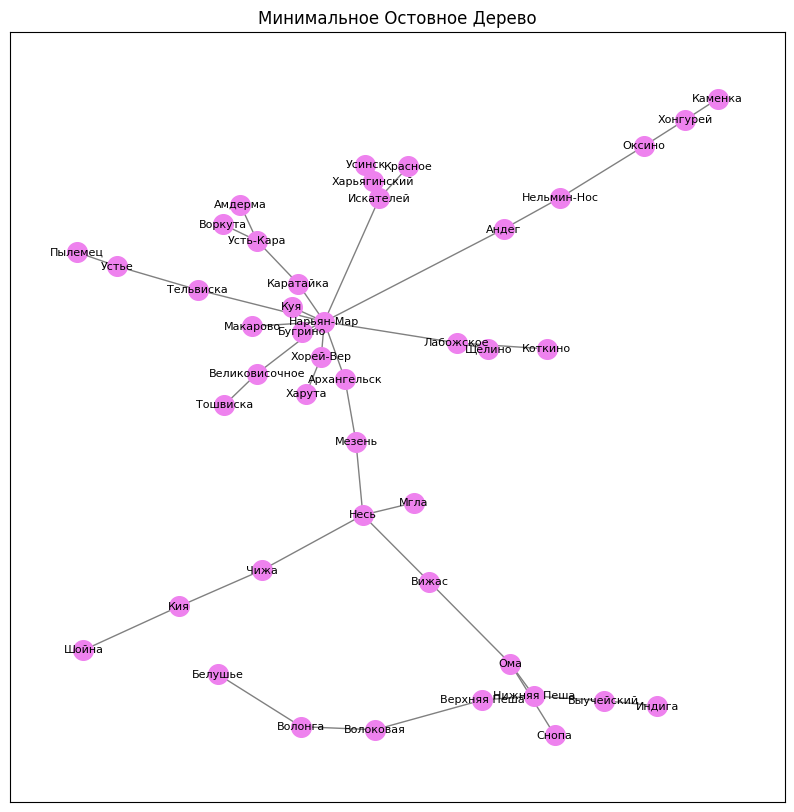

In [ ]:
# Находим минимальное остовное дерево с помощью алгоритма Прима
MST = nx.minimum_spanning_tree(G_time, algorithm='boruvka')
# Визуализация минимального остовного дерева
pos_MST = nx.spring_layout(MST)  # Расположение вершин
labels = nx.get_edge_attributes(MST, 'weight')  # Вес каждого ребра
plt.figure(figsize=(10, 10))  # Размер графика
# Настройка параметров для визуализации
pos_MST = nx.spring_layout(MST)  # Расположение узлов
nx.draw_networkx_nodes(MST, pos_MST, node_size=200, node_color='violet')  # Узлы
nx.draw_networkx_edges(MST, pos_MST, edge_color='gray')  # Рёбра
nx.draw_networkx_labels(MST, pos_MST, font_size=8, font_family='sans-serif')  # Метки узлов
#nx.draw_networkx_edge_labels(MST, pos_MST, edge_labels=edge_labels, font_size=10)  # Метки рёбер

plt.title('Минимальное Остовное Дерево')
plt.show()

### Определение узлов-стоков и узлов-источников

In [ ]:
#Определение узлов без входящих/исходящих рёбер (только для направленных графов)
def find_sources_and_sinks(G):
    sources = []
    sinks = []

    # Проверяем каждую вершину
    for node in G.nodes():
        has_incoming_edge = False
        has_outgoing_edge = False

        # Проверка наличия входящих рёбер
        for other_node in G.predecessors(node):
            has_incoming_edge = True
            break

        # Проверка наличия исходящих рёбер
        if len(list(G.successors(node))) > 0:
            has_outgoing_edge = True

        # Добавляем вершину в соответствующий список
        if not has_incoming_edge:
            sources.append(node)
        if not has_outgoing_edge:
            sinks.append(node)

    return sources, sinks

# Получение результатов
sources, sinks = find_sources_and_sinks(G)
print("Только тяготеют:", sources)
print("Только притягивают:", sinks)

Только тяготеют: ['Андег', 'Кия', 'Снопа', 'Вижас', 'Волонга', 'Макарово', 'Верхняя Пеша', 'Мгла', 'Устье', 'Куя', 'Выучейский', 'Бугрино', 'Хорей-Вер', 'Тошвиска', 'Каратайка', 'Каменка', 'Харьягинский', 'Щелино']
Только притягивают: ['Белушье', 'Волоковая', 'Архангельск', 'Воркута', 'Харута', 'Усинск']
